In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn import metrics as skm
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras import initializers
from keras.models import load_model
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, BatchNormalization, Flatten, Reshape, Concatenate
from keras.layers.recurrent import LSTM, GRU
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from time import time
from keras import metrics

from statistics import mean

from tensorflow.keras.callbacks import EarlyStopping

# early_stopping_monitor = EarlyStopping(patience=3)

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# Load the csv file

df = pd.read_csv("../data/classifier/FinalScores/scores76.csv")
df = df[(df.vader!=0)]
df = df[(df.perc!=0)]
df = df[["vader","secscore","assoc","perc"]]

# predictors = ['vader','secscore','assoc']
predictors = ['vader']
target = ['perc']

print(df.head())

    vader  secscore  assoc  perc
11   0.67      0.27   0.13 -1.57
17  -0.13      0.00  -0.03  1.11
24   0.51      0.00   0.13  0.06
28   0.38      0.00   0.13 -0.37
30   0.42      0.00   0.13  1.45


In [3]:
# Create training and testing datasets

X = df.drop(target, axis=1).values
Y = df[['perc']].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X.shape,Y.shape)

(6661, 3) (6661, 1)
(1666, 3) (1666, 1)
(8327, 3) (8327, 1)


In [5]:
def getAcc(strins, model,X_test,y_test):
    predictions = model.predict(X_test)
    y_pred = []
    test_y = []
    for y in predictions.tolist():
        if y[0]>0:
            y_pred.append(1)
        else:
            y_pred.append(-1)
            

    for y in y_test.tolist():
        if y[0]>0:
            test_y.append(1)
        else:
            test_y.append(-1)

    acc = round(accuracy_score(test_y,y_pred)*100,2)
    cf = skm.confusion_matrix(test_y,y_pred)
    print("Accuracy  = {}\nConfusion = \n{}".format(acc,cf))
#     print(acc,strins)    
    return(acc)

In [7]:
#compile the model
# lossss = ['mean_squared_error','mean_absolute_error','squared_hinge','logcosh','sparse_categorical_crossentropy','poisson'] 
# activationsss = ['elu','relu','softmax','selu','sigmoid','linear','tanh']
# optimizersss = ['rmsprop','adam','sgd','adagrad','adadelta','adamax','nadam']

optimizersss = ['rmsprop','adam','sgd','adagrad','adadelta','adamax']
lossss = ['mean_squared_error','mean_absolute_error','squared_hinge'] 
activationsss = ['relu','softmax','selu','sigmoid','linear']

optimizer='adamax'
activation='selu'
losss='squared_hinge'

results = []

ts = time()
strins = ""
# for optimizer in optimizersss:
#   for losss in lossss:
#     for activation in activationsss:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation=activation,input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(132, activation=activation))
model.add(tf.keras.layers.Dense(64, activation=activation))
model.add(tf.keras.layers.Dense(1))
model.compile(loss=losss, optimizer=optimizer,metrics=[metrics.mae, metrics.categorical_accuracy,metrics.accuracy])


# Train the model
# train_model = model.fit(X_train[0:],y_train[0:],epochs=20,verbose=True,callbacks=[early_stopping_monitor])
train_model = model.fit(X_train[0:],y_train[0:],epochs=20,verbose=True)
strins = ","+optimizer+","+losss+","+activation
# Get Accuracy
results = getAcc(strins,model,X_test,y_test)
        
# print("Predictors: {} - Acc: {}".format(predictors,mean(results)))
print("Took ", time() - ts)

Train on 6661 samples
Epoch 1/20
6661/6661 [==============================] - 0s 70us/sample - loss: 1.0189 - mean_absolute_error: 1.5549 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 2/20
6661/6661 [==============================] - 0s 31us/sample - loss: 1.0088 - mean_absolute_error: 1.5535 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 3/20
6661/6661 [==============================] - 0s 31us/sample - loss: 1.0055 - mean_absolute_error: 1.5524 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 4/20
6661/6661 [==============================] - 0s 41us/sample - loss: 1.0055 - mean_absolute_error: 1.5529 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 5/20
6661/6661 [==============================] - 0s 41us/sample - loss: 0.9989 - mean_absolute_error: 1.5520 - categorical_accuracy: 1.0000 - accuracy: 0.0000e+00
Epoch 6/20
6661/6661 [==============================] - 0s 45us/sample - loss: 1.0013 - mean_absolute_error: 1.5532 - categorica

[0.993701609600635, 1.5853777, 1.0, 0.0]


Text(0, 0.5, 'Predictions')

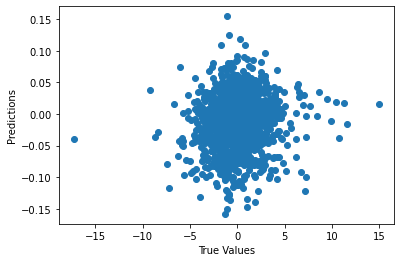

In [9]:
#Evaluate
results = (model.evaluate(X_test,y_test, batch_size=10,verbose=False))
print(results)
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
df['vader'].plot(kind='hist')
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
df2 = pd.read_csv("/content/firstpost-merged.csv") 
df2 = df2['headline']
df2.head()

stopwords = set(STOPWORDS)
stopwords.add('say')
stopwords.add('says')
stopwords.add('rs')
stopwords.add('cr')

comment_words = ' '
for idx,val in enumerate(df2): 
      
  # typecaste each val to string 
  val = str(val) 

  # split the value 
  tokens = val.split() 
    
  # Converts each token into lowercase 
  for i in range(len(tokens)): 
      tokens[i] = tokens[i].lower() 
        
  for words in tokens: 
    comment_words = comment_words + words + ' '

wordcloud = WordCloud(stopwords = stopwords,min_font_size = 10).generate(comment_words) 
# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# save model
model.save("./models/model2.h5")

#load model
model = tf.keras.models.load_model('./models/model2.h5')